Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales

In [55]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('E:\Datasets\DSData-master\Advertising.csv', index_col = 'Unnamed: 0')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [15]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [17]:
df.sample()

,TV,radio,newspaper,sales
90,109.8,47.8,51.4,16.7


In [18]:
df.shape

(200, 4)

In [19]:
# Checking the datatypes 
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

- columns are of float data type

#### Checking for null values

In [20]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

- There are no null values present in the dataset

<AxesSubplot:>

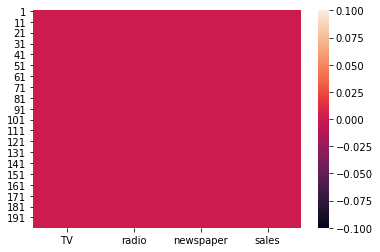

In [21]:
# plotting the heatmap for the null values
sns.heatmap(df.isnull())

### Exploratory Data Analysis (EDA)

##### Data Visualization

In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [23]:
columns = ['TV', 'radio', 'newspaper', 'sales']
columns

['TV', 'radio', 'newspaper', 'sales']

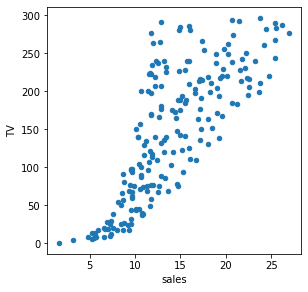

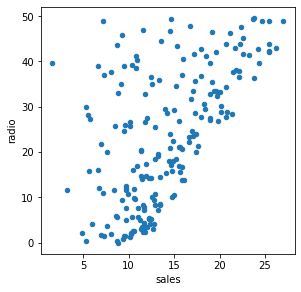

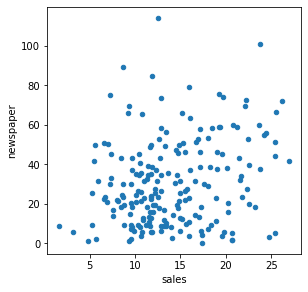

In [26]:
for i in columns[0:3]:
    df.plot(x = 'sales', y = i, kind = 'scatter', subplots = True, layout = (2,2), figsize = (10,10))
    plt.show()

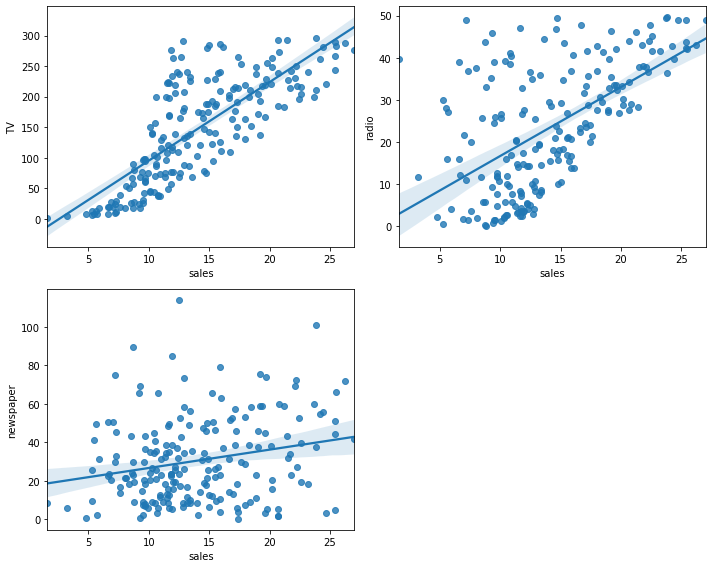

In [28]:
plt.figure(figsize=(10,8))
plot_no = 1
for j in columns:
    if plot_no <= 3:
        ax = plt.subplot(2,2,plot_no)
        sns.regplot(x='sales', y= j, data = df )
    plot_no += 1
plt.tight_layout()

- Observations
    - Both from scatter plot and regression plot we can observe that the sales are continuously increasing for TV and radio
    - Also, for newspaper sales are increasing, but very gradually

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

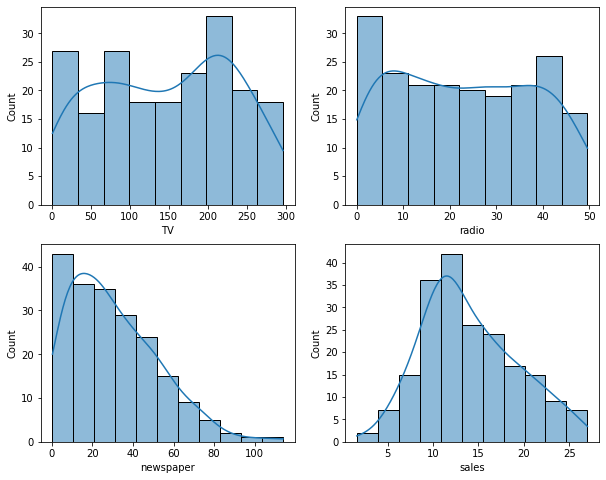

In [29]:
plt.figure(figsize=(10,8))
plot_no = 1
for k in columns:
    if plot_no <= 4:
        ax = plt.subplot(2,2,plot_no)
        sns.histplot(x = k, data = df,kde = True )
    plot_no += 1
plt.tight_layout

- Observations 
    - In sales of TV and radio one can see the bimodal distribution in the data
    - In case of newspaper sales the data is right skewed
    - total sales is almost normally distributed

TV              AxesSubplot(0.125,0.536818;0.352273x0.343182)
radio        AxesSubplot(0.547727,0.536818;0.352273x0.343182)
newspaper          AxesSubplot(0.125,0.125;0.352273x0.343182)
sales           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

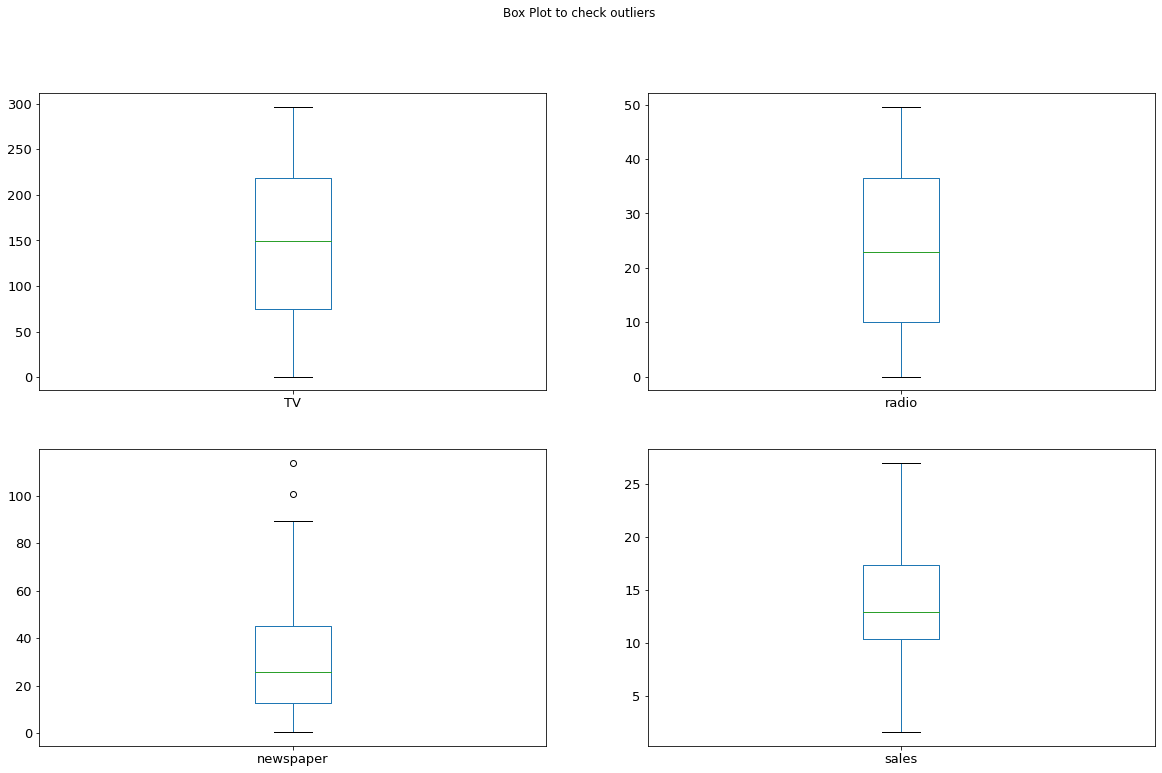

In [30]:
df.plot(kind='box', subplots = True, layout = (2,2), figsize = (20,12), title = "Box Plot to check outliers", fontsize = 13)

- Few outliers are present in the newspaper sales
- based on the maximum values, maximum sales are in TV followed by newspaper then radio

#### Correlation

In [31]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

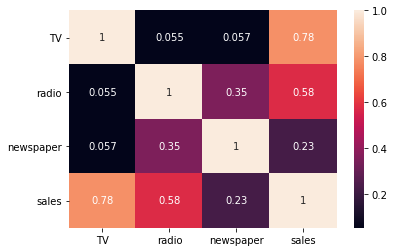

In [32]:
sns.heatmap(df.corr(), annot = True)

- Observations
    - We can clearly see that TV is highly correlated with sales, then next radio which is also highly correlated and then newspaper which is less correlated compared with others.
    - radio and newspaper have a correlation of 0.35, showing the presence of multicollinearity. Hence we need to check for VIF. 


#### Summary Statistics

In [33]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- ##### Observations
    - Max difference between 75% and max in newspaper so outliers are present in newspaper column.
    - mean is greater than median in newspaper column.
    - high standard deviation in Tv column

<AxesSubplot:>

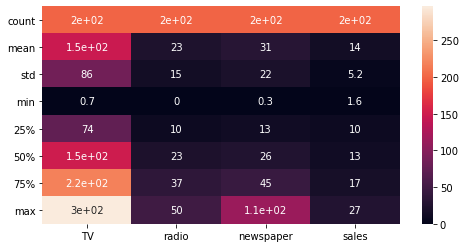

In [34]:
plt.figure(figsize = (8,4))
sns.heatmap(df.describe(), annot = True)

#### skewness

In [35]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

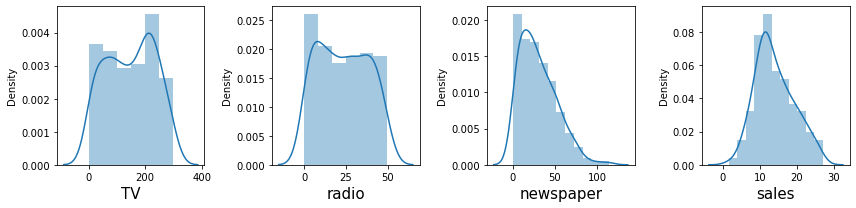

In [36]:
plt.figure(figsize=(12,3))
plot_no = 1
for column in df:
    if plot_no <= 4:
        ax = plt.subplot(1,4,plot_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plot_no += 1
plt.tight_layout()

- There is skewness present in newspaper sales
- TV and radio sales show bimodal distribution

In [38]:
# Removing skewness
df['newspaper'] = np.sqrt(df['newspaper'])

In [39]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.452188
sales        0.407571
dtype: float64

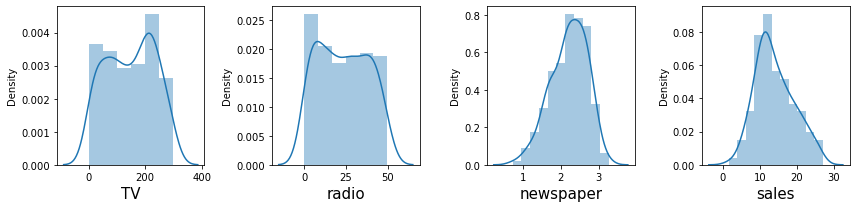

In [40]:
# Distribution Plot after removing skewness
plt.figure(figsize=(12,3))
plot_no = 1
for column in df:
    if plot_no <= 4:
        ax = plt.subplot(1,4,plot_no)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plot_no += 1
plt.tight_layout()

- Skewness removed from newspaper sales data

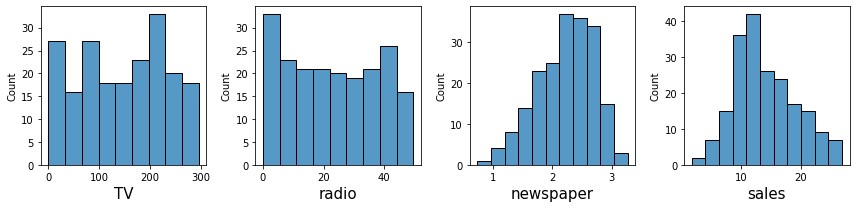

In [41]:
# Histogram Plot after removing skewness
plt.figure(figsize=(12,3))
plot_no = 1
for column in df:
    if plot_no <= 4:
        ax = plt.subplot(1,4,plot_no)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)

    plot_no += 1
plt.tight_layout()

##### Outliers

In [43]:
z_advert= np.abs(zscore(df))
z_advert

array([[9.69852266e-01, 9.81522472e-01, 1.39949599e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.86055092e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.40167822e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.15095501e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.14847686e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.52233784e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 3.05666483e-02, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 7.77053449e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.54875511e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 1.47850304e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 3.41294888e-03, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.68079390e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.32611769e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21171005e

In [44]:
# data with zscore greater than 3
np.where(z_advert>3)

(array([33], dtype=int64), array([2], dtype=int64))

- There is no data with zscore more than 3

#### Feature Engineering

In [45]:
# Spliting the data in x (features) and y(target) 
X = df.iloc[:,:-1]
X.head(2)

,TV,radio,newspaper
1,230.1,37.8,2.884208
2,44.5,39.3,2.591458


In [46]:
y = df.iloc[:,-1]
y.head(2)

1    22.1
2    10.4
Name: sales, dtype: float64

In [47]:
X.shape

(200, 3)

In [48]:
y.shape

(200,)

In [50]:
def vif_calc():
    vif_advert=pd.DataFrame()
    vif_advert['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_advert['features names']=X.columns
    print(vif_advert)

In [51]:
vif_calc()

   VIF_Factor features names
0    3.588197             TV
1    3.763280          radio
2    6.009898      newspaper


- radio and newspaper have high VIF
- from out of the two radio and newspaper from correlation matrix newspaper is less correlated with target values. Hence, droping the newspaper 

In [52]:
df.drop(['newspaper'], axis = 1, inplace = True)
df

,TV,radio,sales
1,230.1,37.8,22.1
2,44.5,39.3,10.4
3,17.2,45.9,9.3
4,151.5,41.3,18.5
5,180.8,10.8,12.9
...,...,...,...
196,38.2,3.7,7.6
197,94.2,4.9,9.7
198,177.0,9.3,12.8
199,283.6,42.0,25.5


In [53]:
# Splitting the data after feature selection
X = df.iloc[:,:-1]
X.head(2)

,TV,radio
1,230.1,37.8
2,44.5,39.3


In [54]:
vif_calc()

   VIF_Factor features names
0    2.238085             TV
1    2.238085          radio


##### Scaling the feature variables using standard scaler

In [56]:
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

<AxesSubplot:xlabel='TV', ylabel='Density'>

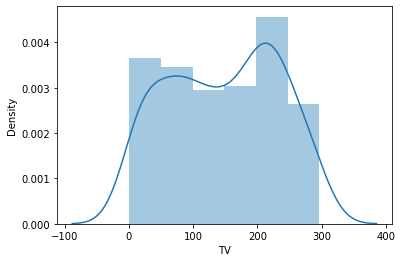

In [57]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

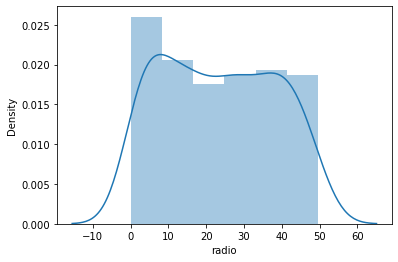

In [58]:
sns.distplot(df['radio'])

### Model Building

In [59]:
# Importing the libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Instantiating each algorithm
lr_ad = LinearRegression()
dtr_ad = DecisionTreeRegressor()
knr_ad = KNeighborsRegressor()
svr_ad = SVR()
rfr_ad = RandomForestRegressor()

# List of instantiated algorithms
algm_ad = [lr_ad, dtr_ad, knr_ad, svr_ad, rfr_ad]

In [62]:
# Maximum accuracy
maxAccu_ad = 0 

# Best random state value for which accuracy is achieved 
maxRS_ad = 0

for i in range(0,500):
    x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=i, test_size=0.20)
    lr_ad.fit(x_train, y_train)
    pred_train_ad= lr_ad.predict(x_train)
    pred_test_ad= lr_ad.predict(x_test)
    score_train_ad = lr_ad.score(x_train, y_train)
    score_test_ad = lr_ad.score(x_test, y_test)
    r2_lr_ad = r2_score(y_test, pred_test_ad)
    print(f'----------------At random State {i} ------------------')
    print(f"Training score is {score_train_ad}")
    print(f"Testing score is {score_test_ad}")
    print(f'r2 score of {lr_ad} is {r2_lr_ad}')
    
    if r2_lr_ad > maxAccu_ad:
        maxAccu_ad = r2_lr_ad
        maxRS_ad = i
        print(f"Maximum score of {lr_ad} is {r2_lr_ad} at Random state {i}")
        print('\n')

----------------At random State 0 ------------------
Training score is 0.906590009997456
Testing score is 0.860454166318657
r2 score of LinearRegression() is 0.860454166318657
Maximum score of LinearRegression() is 0.860454166318657 at Random state 0


----------------At random State 1 ------------------
Training score is 0.8958528468776601
Testing score is 0.8947344950027069
r2 score of LinearRegression() is 0.8947344950027069
Maximum score of LinearRegression() is 0.8947344950027069 at Random state 1


----------------At random State 2 ------------------
Training score is 0.9148698946311157
Testing score is 0.7629335290913726
r2 score of LinearRegression() is 0.7629335290913726
----------------At random State 3 ------------------
Training score is 0.8930073913590098
Testing score is 0.9142565569025372
r2 score of LinearRegression() is 0.9142565569025372
Maximum score of LinearRegression() is 0.9142565569025372 at Random state 3


----------------At random State 4 ------------------
T

###### Getting best score of 95.34% at Random State 151

#### Training with different models

In [63]:
algm_ad = [lr_ad, dtr_ad, knr_ad, svr_ad, rfr_ad]

for m in algm_ad:
    x_train, x_test,y_train, y_test = train_test_split(X,y, random_state=151, test_size=0.20)
    m.fit(x_train, y_train)
    pred_ad =m.predict(x_test)
    print(f'----------------------Model results for {m} ------------------------')
    print(f'Score of {m} is {m.score(x_train, y_train)}')
    print(f'Testing Score of {m} is {m.score(x_test, y_test)}')
    print(f"R2 Score of {m} is  {r2_score(y_test, pred_ad)}")
    print(f"Mean Squared error of {m} is {mean_squared_error(y_test, pred_ad)}")
    print(f"Root Mean Squared error of {m} is {np.sqrt(mean_squared_error(y_test, pred_ad))}")
    print('\n')

----------------------Model results for LinearRegression() ------------------------
Score of LinearRegression() is 0.8801065805087099
Testing Score of LinearRegression() is 0.9534698621582528
R2 Score of LinearRegression() is  0.9534698621582528
Mean Squared error of LinearRegression() is 1.4360177670857868
Root Mean Squared error of LinearRegression() is 1.198339587548449


----------------------Model results for DecisionTreeRegressor() ------------------------
Score of DecisionTreeRegressor() is 1.0
Testing Score of DecisionTreeRegressor() is 0.9556980892421449
R2 Score of DecisionTreeRegressor() is  0.9556980892421449
Mean Squared error of DecisionTreeRegressor() is 1.3672499999999992
Root Mean Squared error of DecisionTreeRegressor() is 1.169294659185613


----------------------Model results for KNeighborsRegressor() ------------------------
Score of KNeighborsRegressor() is 0.9831800040277207
Testing Score of KNeighborsRegressor() is 0.9715696598740851
R2 Score of KNeighborsRegres

#### Observation
1. Out of the 5 models tested Random forest is giving better results
2. Next we will perform cross validation for all the models, then decide the best model

### Cross Validation of Each model

In [64]:
# Before checking all the models we will identify best 'cv' value using Linear Regression 
from sklearn.model_selection import cross_val_score
max_cvscore_ad = 0 
max_cv_ad = 0
for j in range(2,15):
    cv_score_ad = cross_val_score(lr_ad, X,y,cv=j)
    cv_mean_ad = cv_score_ad.mean()
    print(f"At cross fold {j} the cv score is {cv_mean_ad}")
    print('\n') 
    
    if cv_mean_ad > max_cvscore_ad:
        max_cvscore_ad = cv_mean_ad
        max_cv_ad = j
        print(f"At cross fold {j} the Maximum CV score is {max_cvscore_ad}")

At cross fold 2 the cv score is 0.8942166468026784


At cross fold 2 the Maximum CV score is 0.8942166468026784
At cross fold 3 the cv score is 0.8931635501481657


At cross fold 4 the cv score is 0.8916530235661282


At cross fold 5 the cv score is 0.889282957306453


At cross fold 6 the cv score is 0.8910268337384196


At cross fold 7 the cv score is 0.887824825599243


At cross fold 8 the cv score is 0.8845638944511246


At cross fold 9 the cv score is 0.8839789119628068


At cross fold 10 the cv score is 0.8869670516810129


At cross fold 11 the cv score is 0.8789617225099257


At cross fold 12 the cv score is 0.8862330509464184


At cross fold 13 the cv score is 0.8857367723878651


At cross fold 14 the cv score is 0.8761527205995732




##### Getting better results at cross validation of '2'

In [65]:
# Using cross validation for all the models
# algm_ad is a list containing the instance of all the models

for m_cv in algm_ad:
    cv_score = cross_val_score(m_cv,X,y,cv=2)
    cv_mean = cv_score.mean()
    print('---------------------------------------------------')
    print(f"The cross validation score is {cv_mean} for {m_cv}")
    print('\n')

---------------------------------------------------
The cross validation score is 0.8942166468026784 for LinearRegression()


---------------------------------------------------
The cross validation score is 0.9453088482155801 for DecisionTreeRegressor()


---------------------------------------------------
The cross validation score is 0.9569484442649197 for KNeighborsRegressor()


---------------------------------------------------
The cross validation score is 0.929448898538536 for SVR()


---------------------------------------------------
The cross validation score is 0.9738361811554807 for RandomForestRegressor()




##### As we can even with cross validation the Random forest Regressor is having better score. Hence proceeding with Hyper parameter tuning using Random Forest Regressor

### Hyper Parameter tuning

In [69]:
# Tuning for Random Forest Regressor
from sklearn.model_selection import GridSearchCV

# creating parameter list for GridSearchCV
parameter_rf_ad = {'n_estimators':[100,200,300],
                   'max_depth': [2,4,6,8],
                   'criterion': ['mse','mae'], 
                   'max_features':['auto','sqrt','log2']}

In [70]:
grid_rfr = GridSearchCV(rfr_ad,
                     parameter_rf_ad,
                     cv=2)

In [73]:
# Training grid search 
grid_rfr.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [74]:
# Getting the best parameters
grid_rfr.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [75]:
# Best Estimator
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=8)

In [76]:
grid_rfr_pred=grid_rfr.best_estimator_.predict(x_test)

print(f'Final Accuracy with {rfr_ad}')
r2_score(y_test,grid_rfr_pred)

Final Accuracy with RandomForestRegressor()


0.9783347439482941

### Pickling

In [77]:
# Pickling of the file or serialization of a file
import joblib
joblib.dump(grid_rfr.best_estimator_,"Advertising.pkl")

['Advertising.pkl']

In [78]:
advertising_model = joblib.load('Advertising.pkl')
advertising_result = advertising_model.score(x_test, y_test)
print(advertising_result*100)

97.83347439482941


#### Conclusion

In [79]:
advertising_conclusion = pd.DataFrame([advertising_model.predict(x_test),y_test], index=['Predicted', 'Original'])
advertising_conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,9.300417,12.63502,11.400269,10.315583,8.600098,20.912102,25.274983,7.516,8.5429,6.360417,...,12.8619,12.208686,11.157826,11.425817,19.962967,19.528967,6.90475,20.304683,20.266883,15.229567
Original,8.400000,13.20000,11.400000,10.100000,8.000000,21.200000,24.200000,6.900,9.5000,4.800000,...,12.8000,12.300000,11.600000,11.700000,18.900000,18.900000,5.90000,20.200000,20.200000,16.700000
